### Distance between Two Partitions

앞서 랜덤 변수의 유사도를 평가하는 방법을 도출했다. 이들 개념을 동일한 데이터셋의 두 분할을 비교하는 문제에 확장할 수 있다. 여기서 분할은 어느 정도 랜덤이라고 고려할 수 있다. Dataset $D$의 분할 $P$는 다음과 같은 상호 분리된 non-empty 집합인 부분 집합들의 순서 없는 집합이다.

$$\begin{align}
&P=\{D_k\}_{k=1,\dots,K}, \Vert D_k \Vert > 0, \forall k, \\
&D_k \cap D_I = \varnothing, \forall k \neq l, \\
&\bigcup_{k=1}^k D_k = D
\end{align}$$

$P$에 관련된 불확실성을 정의하자. 첫째, 어떤 원소 $d \in D$를 뽑는 확률을 $\tilde{p}[d] = \frac{1}{\Vert D \Vert}$로 설정한다. 둘째, 랜덤하게 뽑은 원소 $d \in D$가 부분 집합 $D_k$에 속할 확률을 $p[k] = \frac{\Vert D_k \Vert}{\Vert D \Vert}$로 정의한다. 셋째, 확률 $p[k]$는 $S = \{1,\dots,K\}$로부터 값 $k$를 취하는 이산 랜덤 변수와 연관된다. 넷째, 이 이산 랜덤 변수에 관련된 불확실성은 엔트로피로 표현할 수 있다.

$$H[P] = -\sum_{k=1}^K p[k]\log[p[k]]$$

위로부터 $H[P]$가 $\Vert D \Vert$에 의존하지 않지만, 부분 집합들의 상대적인 크기는 의존한다는 것을 알 수 있다. 두 번째 분할 $P^\prime = \left\{ D^\prime_{k^\prime}\right\}_{k=1, \dots, K}$이 주어졌을 때 $S^\prime = \left\{ 1, \dots, K^\prime\right\}$에서 $k^\prime$ 값을 취하는 두 번째 랜점 변수를 정의할 수 있다. 랜덤하게 뽑은 원소 $d \in D$는 $P$ 안의 부분 집합 $D_k$에 속하고, 또한 $P^{\prime}$의 부분 집합 $D^\prime_{k^\prime}$에 속할 결합 확률은 다음과 같다.

$$p[k, k^\prime] = \frac{\Vert D_k \cap D^\prime_{k^\prime}\Vert}{ \Vert D \Vert}$$

결합 엔트로피는 다음과 같이 정의된다.

$$H[P, P^\prime] = -\sum_{k=1}^K \sum_{k^{\prime} = 1}^{K^\prime} p[k, k^\prime] \log [p[k, k^\prime]]$$

그리고 조건부 엔트로피는 $H[P|P^\prime] = H[P, P^\prime] - H[P]$이다. mutual information은 다음과 같다. 

$$I[P,P^\prime] = H[P] - H[P|P^\prime] = \sum_{k=1}^K \sum_{k^\prime = 1}^{K^\prime} p[k, k^\prime] \log \left[ \frac{p[k, k^\prime]}{p[k]p[k^\prime]}\right]$$

그리고 정보 변분은 다음과 같다.

$$\text{VI}[P, P^\prime] = H[P|P^\prime]  + H[P^\prime | P]$$

여기서 분할 P에서 P'로 변할 때 $H[P|P']$는 P에 대한 정보 손실량을 측정하며, $H[P'|P]$는 P'에 대한 정보 이득량을 측정한다. 이 정보 변분의 정의는 여러 특성을 가지는데, 그중 (1) 이는 거리 척도이고, (2) 이는 (엔트로피와 같이) $VI[P, P'] \leq \log(|\Pi|)$에서 절대적 상계를 가지며, (3) 부분 집합의 수는 상수 K에 의해 한정되는데 $K \leq \sqrt{|\Pi|}$에 따라 $VI[P, P'] \leq 2 \log K$이다. 이를 채택하는 또 다른 이유는 상위 클러스터링을 통해 상이한 데이터에서 각 분할 알고리즘을 비교할 수 있게 하므로 중요하다. 비지도학습의 맥락에서 정보 변분은 분할(비계층적) 군집 알고리즘으로부터의 결과를 비교하는 데 유용하다.

### Experimental Results

상호 정보는 두 랜덤 변수에 의해 공유되는 정보의 양을 계량화한다. 정규화된 상호 정보는 상관계수의 절댓값처럼 $[0,1]$ 범위 내에서 실수를 취한다. 또한 상관계수(또는 그의 절댓값)처럼 상호 정보나 정규화된 상호 정보 모두 진정한 거리 척도는 아니다. 상관계수를 가진 두 랜덤 표준 정규 변수 $X$와 $Y$ 간의 상호 정보는 다음과 같다고 알려져 있다.

$$
I[X, Y] = -\frac{1}{2} \log(1 - \rho^2)
$$

정규화된 상호 정보로 선형대수의 상관계수 정보 이론적 통의어로 간주할 수 있다는 것이 바로 이런 의미에서다. 다음에서 양 통계량이 서로 다른 시나리오에서 어떻게 작동하는지 연구한다.

#### 1. No Relationship

표준 가우시안 분포로부터 랜덤 숫자 x와 e의 두 배열을 추출함으로써 시작한다. 그리고 나서 $y = 0x + e = e$를 계산하고, $x$와 $y$ 간의 상관계수와 함께 정규화된 상호 정보의 값을 구한다.

In [38]:
import numpy as np

size = 5000
seed = 0
x = np.random.normal(size = size)
e = np.random.normal(size = size)
y = 0*x + e

In [39]:
import pandas as pd

temp_ret = pd.DataFrame(
    [x, y]
).T

In [40]:
from FinancialMachineLearning.metrics.distance import mutual_information

nmi = mutual_information(temp_ret, norm = True)

In [41]:
corr = temp_ret.corr()

아래 그림은 $x$에 대한 $y$를 표현한다. 이는 예상대로 구름처럼 뭉쳐 있다. 상관계수와 정규화된 상호 정보는 모두 0에 근사한다. 관계가 없는 경우 둘다 그렇다.

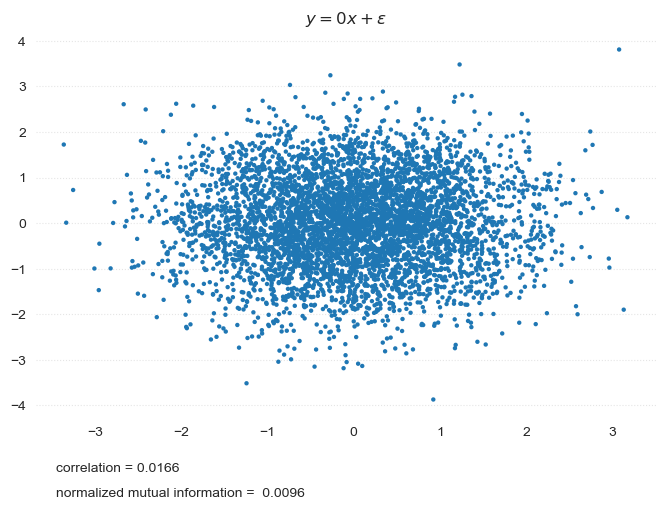

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8, 5))
plt.scatter(
    temp_ret[0], temp_ret[1],
    s = 10,
    edgecolor = 'none',
    color = 'tab:blue'
)
plt.figtext(0.15, 0, f"correlation = {corr.iloc[0,1] :.4f}", ha='left', fontsize=10)
plt.figtext(0.15, -0.05, f"normalized mutual information = {nmi.iloc[0,1] : .4f}", ha='left', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.title(r'$y=0x + \varepsilon$')
plt.show()

#### 2. Linear Relationship

이 예에서는 $y = 100x + e$로 설정해서 x와 y 간에 강한 선형관계를 부여한다. 이제 상관계수는 거의 1이고, 정규화 상호 정보 또한 근사적으로 0.9로 매우 높다. 여전히 정규화 상호 정보는 $e$에 관련된 어느 정도의 불확실성이 존재하기 때문에 1이 아니다. 예를 들어, $y = 10^4x + e$를 부여하면 정규화 상호 정보는 0.995다. 아래 그림은 이 관계를 그린다.

In [45]:
size = 5000
seed = 0
x = np.random.normal(size = size)
e = np.random.normal(size = size)
y = 100*x + e

In [46]:
temp_ret = pd.DataFrame(
    [x, y]
).T
nmi = mutual_information(temp_ret, norm = True)
corr = temp_ret.corr()

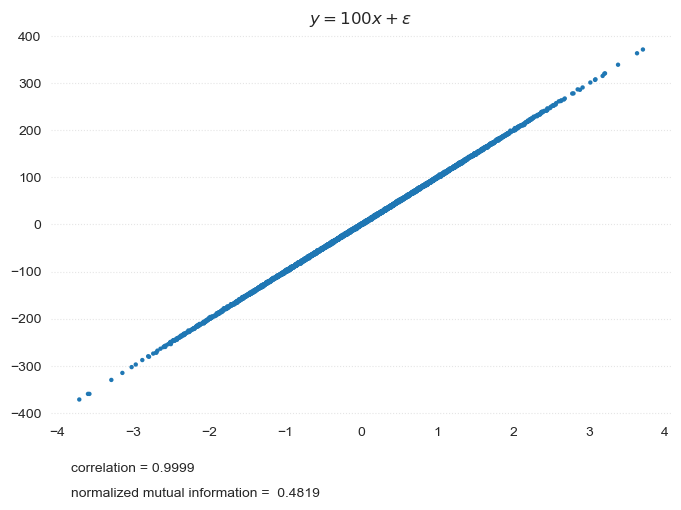

In [47]:
fig, ax = plt.subplots(figsize = (8, 5))
plt.scatter(
    temp_ret[0], temp_ret[1],
    s = 10,
    edgecolor = 'none',
    color = 'tab:blue'
)
plt.figtext(0.15, 0, f"correlation = {corr.iloc[0,1] :.4f}", ha='left', fontsize=10)
plt.figtext(0.15, -0.05, f"normalized mutual information = {nmi.iloc[0,1] : .4f}", ha='left', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.title(r'$y=100x + \varepsilon$')
plt.show()

#### 3. Nonlinear Relationship

이 예제에서는 $y = |100x| + e$ 로 설정해 $x$와 $y$ 간의 $x$축을 사이로 하는 대칭 관계를 부여한다. 이때 상관계수는 거의 0이지만, 정규화 상호 정보는 근사적으로 0.64다. 예상대로 상관계수는 관계가 비선형이므로 $x$와 $y$ 간의 강한 관계를 인지하지 못한다. 대조적으로 상호 정보는 $y$를 예측하고자 유용한 상관량의 정보를 $x$로부터 추출할 수 있다.

선형 경우와 달리 계수를 $10^2$에서 $10^4$로 올리는 것은 정규화 상호 정보를 크게 증가시키지는 않는다. 이 예에서 불확실성의 주요 원천은 $e$가 아니다. 정규화 상호 정보는 높지만, $|x|$를 아는 것이 $x$를 알기에 충분하지 않기 때문에 1은 아니다. 사실 각 값에 연관된 2개의 다른 $x$값이 존재한다.

In [48]:
size = 5000
seed = 0
x = np.random.normal(size = size)
e = np.random.normal(size = size)
y = 100*np.abs(x) + e

In [49]:
temp_ret = pd.DataFrame(
    [x, y]
).T
nmi = mutual_information(temp_ret, norm = True)
corr = temp_ret.corr()

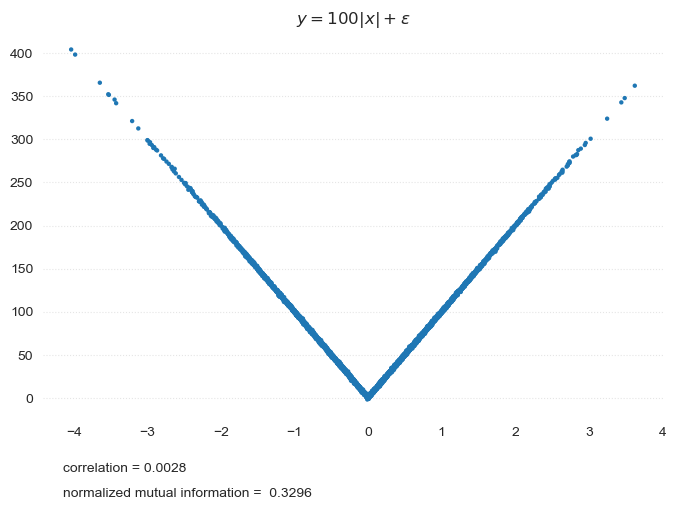

In [50]:
fig, ax = plt.subplots(figsize = (8, 5))
plt.scatter(
    temp_ret[0], temp_ret[1],
    s = 10,
    edgecolor = 'none',
    color = 'tab:blue'
)
plt.figtext(0.15, 0, f"correlation = {corr.iloc[0,1] :.4f}", ha='left', fontsize=10)
plt.figtext(0.15, -0.05, f"normalized mutual information = {nmi.iloc[0,1] : .4f}", ha='left', fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xticks(rotation = 0)
plt.title(r'$y=100|x| + \varepsilon$')
plt.show()

### Conclusion

상관계수는 랜덤 변수 간의 선형 상호의존성을 계량화하는 데 유용하다. 이런 형태의 상호의존성은 거리 척도로 $d_p[X,Y] = \sqrt{\frac{1}{2}(1-\rho[X,Y])}$ 또는 $ d_p[X, Y] = \sqrt{1 - \rho[X, Y]} $ 와 같은 다양한 표현을 받아들인다. 그러나 변수 $X$와 $Y$가 비선형관계에 의해 한정될 때 위의 거리 척도는 이들 변수들의 유사도를 오판한다. 비선형의 경우 정규화 정보 변분이 더 적절한 거리 척도로서의 도입을 주장한다. 이는 랜덤 변수에 의해 제공되는 고유한 정보에 관련된 질문에 특정 가정을 하지 않고도 답변을 제공할 수 있게 한다. 여러 머신러닝 알고리즘이 데이터에 대해 함수 형태를 부여하지 않기 때문에 이들을 엔트로피 기반의 특성과 함께 사용하는 것은 합리적이다.